In [69]:
import torch
import glob
import re
import sys
import os
import importlib
from test import test_net, compare_two_nets_by_sample
from torchvision import transforms
from utils import SCRATCH_PATH
from test import compare_n_nets_by_sample, diff_when_wrong_many
from plots import prepare_images, plot_image_grid
import plots
import test
plots = importlib.reload(plots)
test = importlib.reload(test)

In [2]:
torch.cuda.get_device_name(0)

AssertionError: Torch not compiled with CUDA enabled

In [5]:
os.getcwd()

'/Users/alecflowers/Documents/EPFL/2022_spring/dynamic_poly_nn'

In [2]:
paths = list(filter(
        lambda x: not re.search('xxxx', x),
        glob.glob(f"{SCRATCH_PATH}/logs/CIFAR10/*poly*/best_model", recursive=True)
    ))

configs = list(filter(
        lambda x: not re.search('xxxx', x),
        glob.glob(f"{SCRATCH_PATH}/logs/CIFAR10/*poly*/r_resnet_pi-net.yml", recursive=True)
    ))

In [3]:
dataset, y_true, y_pred_list = compare_n_nets_by_sample(paths, configs)

Dataset: CIFAR10 Epochs: 81
Files already downloaded and verified
Files already downloaded and verified
Running on: cpu
 [79/79]Average Accuracy: 0.92 
Per Class Accuracy: [0.927 0.966 0.904 0.837 0.928 0.868 0.948 0.935 0.947 0.946]
Dataset: CIFAR10 Epochs: 81
Files already downloaded and verified
Files already downloaded and verified
Running on: cpu
 [79/79]Average Accuracy: 0.87 
Per Class Accuracy: [0.865 0.943 0.819 0.743 0.86  0.838 0.909 0.899 0.924 0.915]


In [7]:
ind = diff_when_wrong_many(y_true, *y_pred_list)

0 Models Correct: 519 of 10000 is 5.2%
1 Models Correct: 1041 of 10000 is 10.4%
    - Models (0,) Correct: 766 of 1041 is 73.6%
    - Models (1,) Correct: 275 of 1041 is 26.4%
2 Models Correct: 8440 of 10000 is 84.4%
    - Models (0, 1) Correct: 8440 of 8440 is 100.0%


In [34]:
paths2 = list(filter(
        lambda x: not re.search('162503|160428', x),
        glob.glob(f"{SCRATCH_PATH}/logs/CIFAR10/ResNet*/best_model", recursive=True)
    ))

configs2 = list(filter(
        lambda x: not re.search('xxxx', x),
        glob.glob(f"{SCRATCH_PATH}/logs/CIFAR10/ResNet*/r_resnet_default.yml", recursive=True)
    ))

In [77]:
paths2

['/Users/alecflowers/Documents/EPFL/2022_spring/dynamic_poly_nn/scratch/logs/CIFAR10/ResNet18_None_20220411-170932/best_model',
 '/Users/alecflowers/Documents/EPFL/2022_spring/dynamic_poly_nn/scratch/logs/CIFAR10/ResNetnew_2to4_20220411-172433/best_model']

In [37]:
dataset2, y_true2, y_pred_list2 = compare_n_nets_by_sample(paths2, configs2)

Dataset: CIFAR10 Epochs: 81
Files already downloaded and verified
Files already downloaded and verified
Running on: cpu
 [79/79]Average Accuracy: 0.94 
Per Class Accuracy: [0.937 0.979 0.905 0.858 0.955 0.897 0.953 0.948 0.968 0.959]
Dataset: CIFAR10 Epochs: 81
Files already downloaded and verified
Files already downloaded and verified
Running on: cpu
 [79/79]Average Accuracy: 0.91 
Per Class Accuracy: [0.923 0.958 0.877 0.793 0.931 0.87  0.947 0.918 0.95  0.931]


In [38]:
ind2 = diff_when_wrong_many(y_true2, *y_pred_list2)

0 Models Correct: 421 of 10000 is 4.2%
1 Models Correct: 701 of 10000 is 7.0%
    - Models (0,) Correct: 481 of 701 is 68.6%
    - Models (1,) Correct: 220 of 701 is 31.4%
2 Models Correct: 8878 of 10000 is 88.8%
    - Models (0, 1) Correct: 8878 of 8878 is 100.0%


In [80]:
i = diff_when_wrong_many(y_true, y_pred_list[0], y_pred_list2[0])

0 Models Correct: 374 of 10000 is 3.7%
1 Models Correct: 687 of 10000 is 6.9%
    - Models (1,) Correct: 420 of 687 is 61.1%
    - Models (0,) Correct: 267 of 687 is 38.9%
2 Models Correct: 8939 of 10000 is 89.4%
    - Models (0, 1) Correct: 8939 of 8939 is 100.0%


In [81]:
i = diff_when_wrong_many(y_true, y_pred_list[1], y_pred_list2[1])

0 Models Correct: 550 of 10000 is 5.5%
1 Models Correct: 1087 of 10000 is 10.9%
    - Models (1,) Correct: 735 of 1087 is 67.6%
    - Models (0,) Correct: 352 of 1087 is 32.4%
2 Models Correct: 8363 of 10000 is 83.6%
    - Models (0, 1) Correct: 8363 of 8363 is 100.0%


In [39]:
all_y_pred = [*y_pred_list, *y_pred_list2]

In [70]:
ind3, model_indices3 = test.diff_when_wrong_many(y_true2, *all_y_pred)

0 Models Correct: 235 of 10000 is 2.4%
1 Models Correct: 296 of 10000 is 3.0%
    - Models (2,) Correct: 117 of 296 is 39.5%
    - Models (0,) Correct: 70 of 296 is 23.6%
    - Models (3,) Correct: 58 of 296 is 19.6%
    - Models (1,) Correct: 51 of 296 is 17.2%
2 Models Correct: 438 of 10000 is 4.4%
    - Models (0, 2) Correct: 128 of 438 is 29.2%
    - Models (0, 1) Correct: 65 of 438 is 14.8%
    - Models (2, 3) Correct: 109 of 438 is 24.9%
    - Models (1, 2) Correct: 48 of 438 is 11.0%
    - Models (0, 3) Correct: 58 of 438 is 13.2%
    - Models (1, 3) Correct: 30 of 438 is 6.8%
3 Models Correct: 918 of 10000 is 9.2%
    - Models (0, 2, 3) Correct: 510 of 918 is 55.6%
    - Models (1, 2, 3) Correct: 146 of 918 is 15.9%
    - Models (0, 1, 2) Correct: 188 of 918 is 20.5%
    - Models (0, 1, 3) Correct: 74 of 918 is 8.1%
4 Models Correct: 8113 of 10000 is 81.1%
    - Models (0, 1, 2, 3) Correct: 8113 of 8113 is 100.0%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

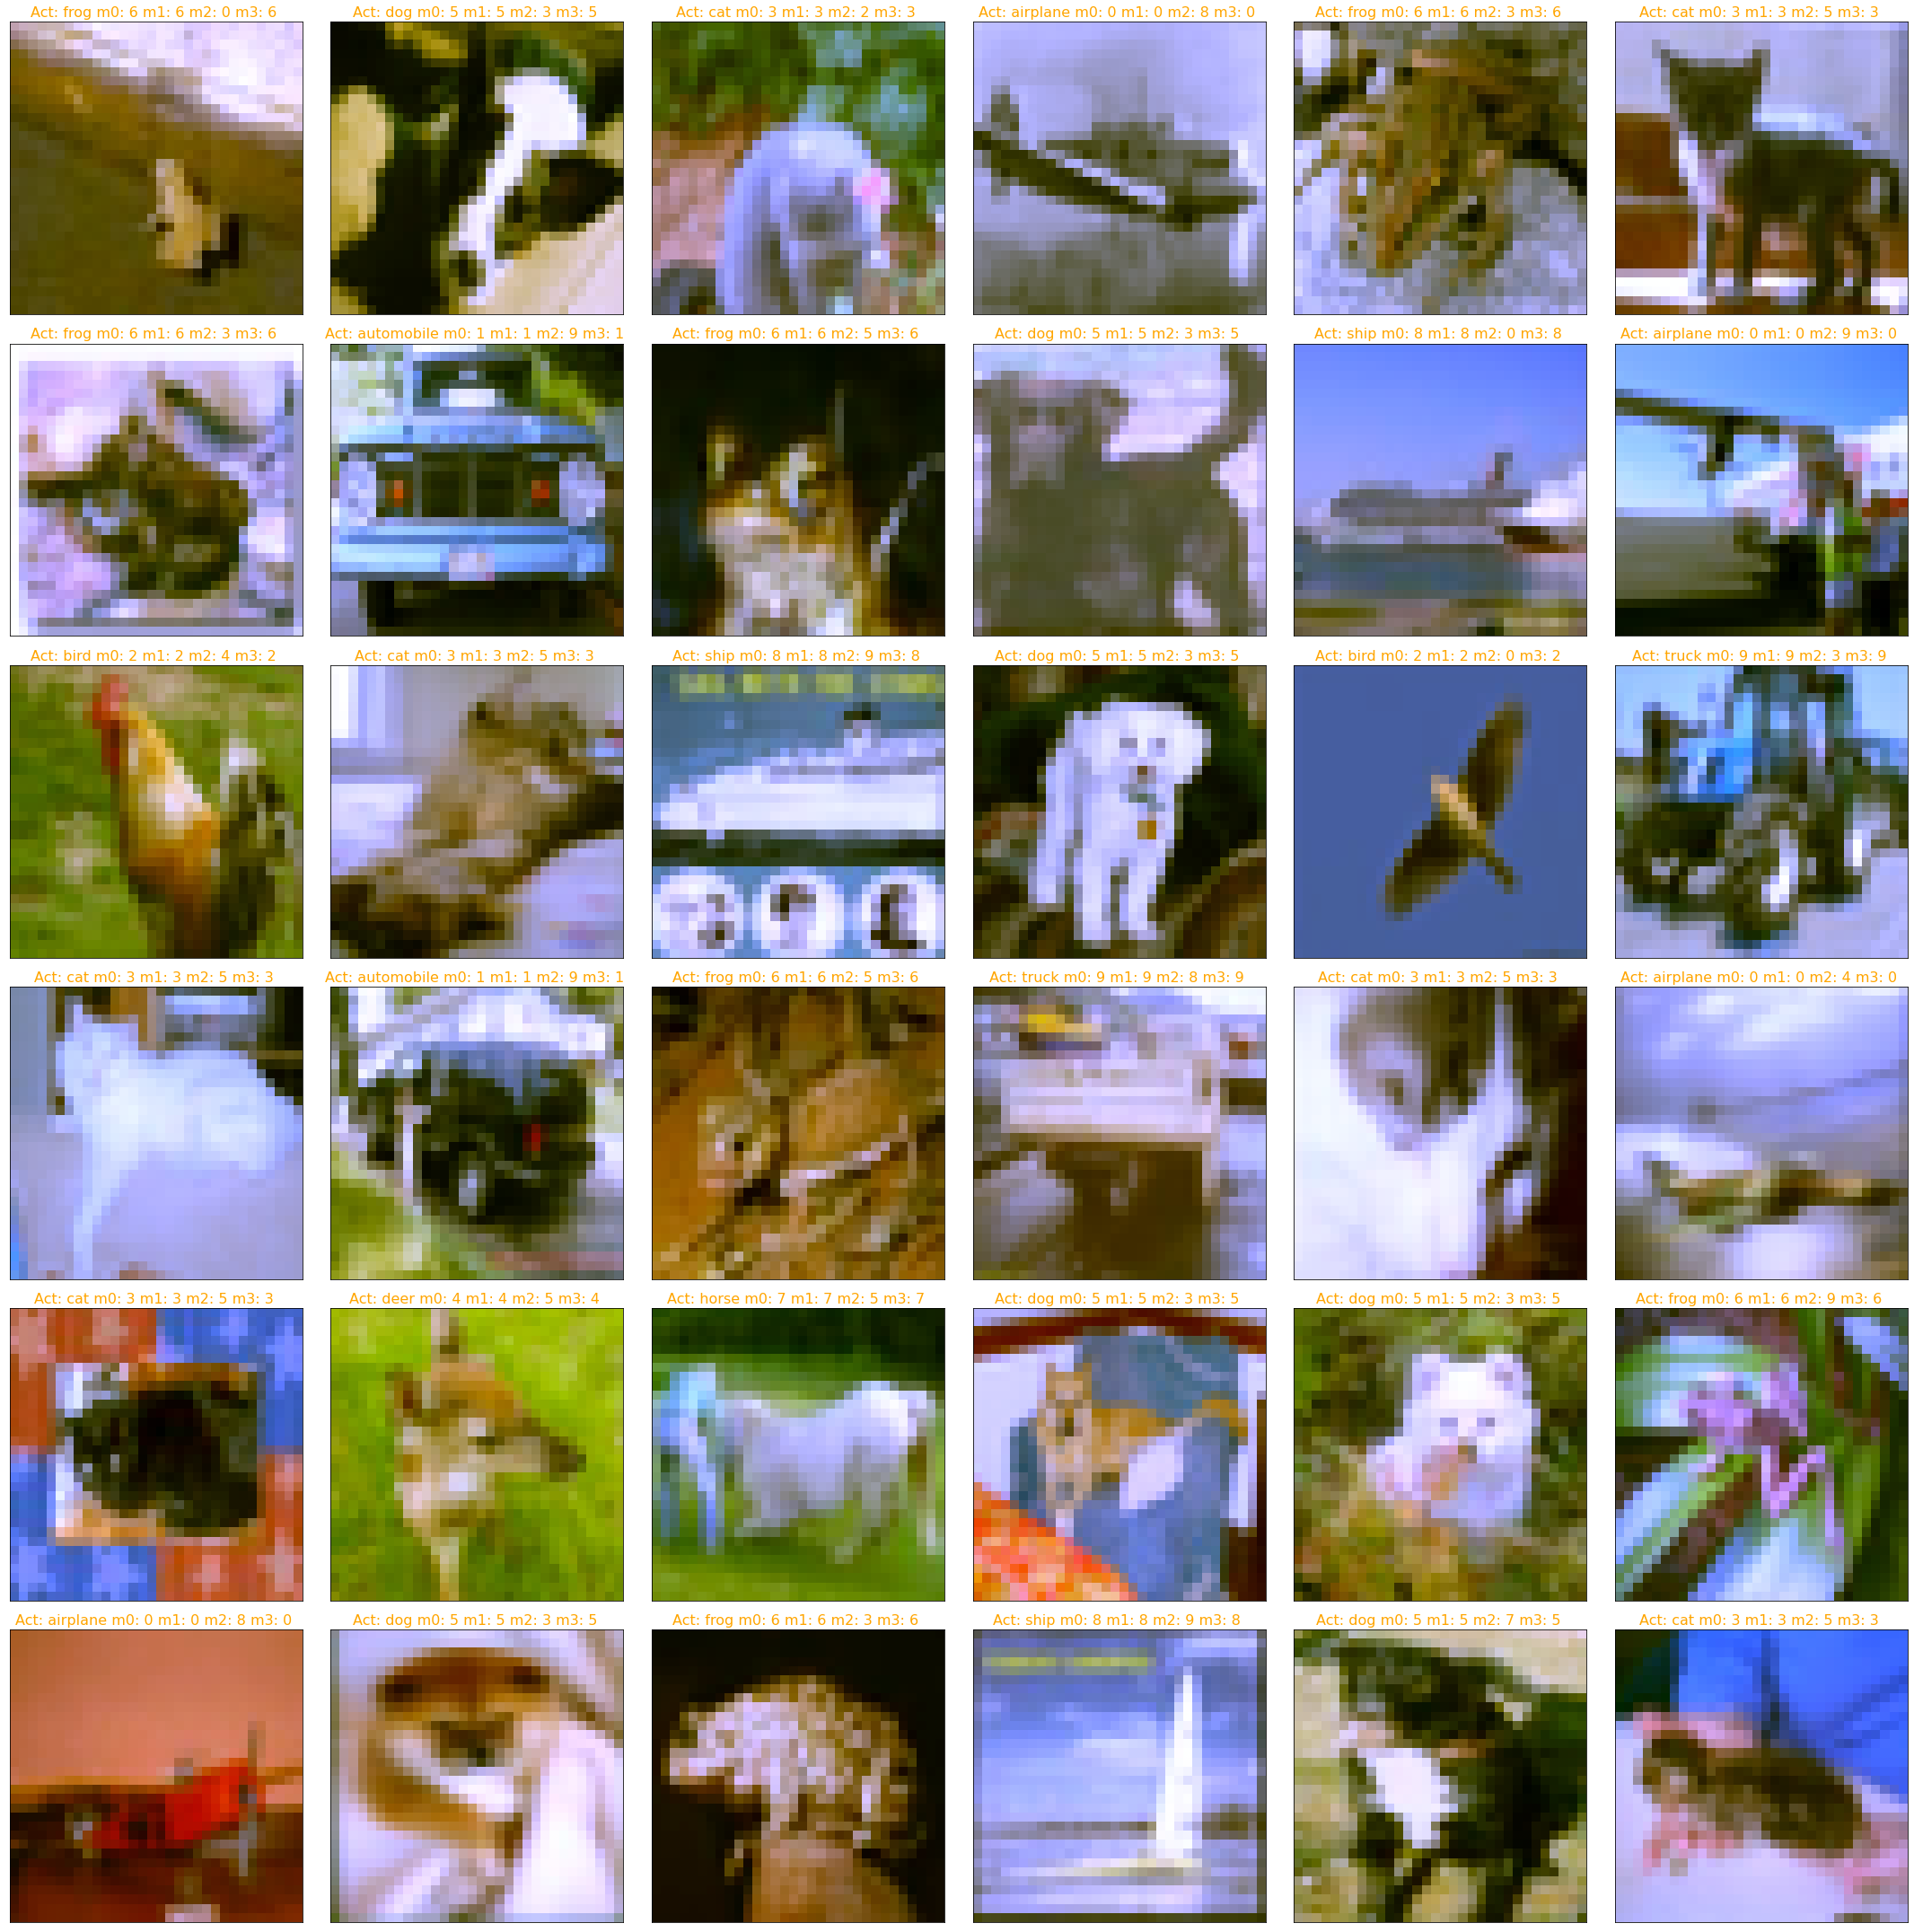

In [75]:
# transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
unorm = transforms.Normalize(mean=[-0.4914/0.2023, -0.4822/0.1994, -0.4465/0.4465], std=[1/0.2023, 1/0.1994, 1/0.4465])
img_list, label_list, mapping = plots.prepare_images(dataset, model_indices3[(0, 1, 3)][0:36], *all_y_pred, unorm=unorm)
plots.plot_image_grid(img_list, subplot_title=label_list,)

In [66]:
mapping

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}